In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
os.chdir('/home/alexcc/song_collaboration/bgc_tran')

from plot_mibig import mibig_viewer

In [8]:
from data_loading import load_mibig_metadata, load_data

mibig_metadata = load_mibig_metadata()
datasets = load_data(mibig_metadata)
mibig_struct = mibig_metadata[pd.notnull(mibig_metadata.Structure)]

Using 848 BGCs with both pfam and cath transporters, as well as Gram +/-.
Dataset pfam has 0 examples with all zeros.
Dataset cath has 0 examples with all zeros.
Dataset sbp has 759 examples with all zeros.
Dataset biosynthetic has 115 examples with all zeros.


In [11]:
from prediction_utils import mw_preprocess
mw_data = {k: mw_preprocess(d, mibig_metadata, verbose=True) for k, d in datasets.items()}

There are 558 examples for binned weight prediction.
Num > 1000: 149
Num <= 1000: 409
There are 558 examples for binned weight prediction.
Num > 1000: 149
Num <= 1000: 409
There are 558 examples for binned weight prediction.
Num > 1000: 149
Num <= 1000: 409
There are 558 examples for binned weight prediction.
Num > 1000: 149
Num <= 1000: 409


In [12]:
unknowns = mibig_struct.query("Activities.isnull() & Antibacterial == 0 & Antifungal == 0 & Siderophore == 0 & Orf_length <= 50")
mw_data['pfam_and_sbps'] = pd.merge(mw_data['pfam'], mw_data['sbp'], on='BGC')
unknown_data = mw_data['pfam_and_sbps'][mw_data['pfam_and_sbps']['BGC'].isin(unknowns['BGC'])]

In [13]:
mibig_struct[mibig_struct.BGC.isin(unknown_data.query("Peripla_BP_2 > 0")['BGC'])]

,BGC,Genus,Name,Compound_count,MW,TPSA,LOGP,HACC,HDON,Type,Activities,Structure,Gram,Antibacterial,Antifungal,Siderophore,Orf_length
336,BGC0000371,Rhodococcus,heterobactin a,2,615.228890,276.24,-1.25510,10.0,10.0,NRP,NaN,NC(NCCC[C@@H](NC(=O)C1=C(O)C(O)=CC=C1)C(=O)NCC...,1,0,0,0,11
845,BGC0000699,Streptomyces,hygromycin a,1,511.168975,204.47,-2.46740,12.0,7.0,Saccharide,NaN,CC(=O)[C@H]1O[C@@H](OC2=C(O)C=C(\C=C(/C)C(=O)N...,1,0,0,0,33
1015,BGC0000366,Streptomyces,gobichelin a,2,671.302724,273.69,-2.42450,12.0,9.0,NRP,NaN,C1C[C@@H](C(=O)N(C1)O)NC(=O)[C@H](CO)NC(=O)[C@...,1,0,0,0,18
1318,BGC0000708,Streptomyces,lividomycin,1,761.354210,406.24,-10.00830,23.0,15.0,Saccharide,NaN,C1[C@H]([C@@H]([C@H]([C@@H]([C@H]1N)O[C@@H]2[C...,1,0,0,0,30
1630,BGC0000368,Streptomyces,streptobactin,1,1179.494500,560.58,-3.33129,21.0,21.0,NRP,NaN,C[C@H]1OC(=O)[C@@H](NC(=O)[C@H](CCCNC(N)=N)NC(...,1,0,0,0,17
1708,BGC0000074,Streptomyces,herbimycin a,1,574.289031,152.48,2.71330,9.0,2.0,Polyketide,NaN,CO[C@H]1C[C@H](C)[C@@H](OC)C2=CC(=O)C=C(NC(=O)...,1,0,0,0,30


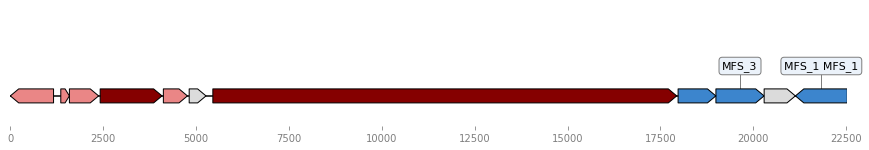

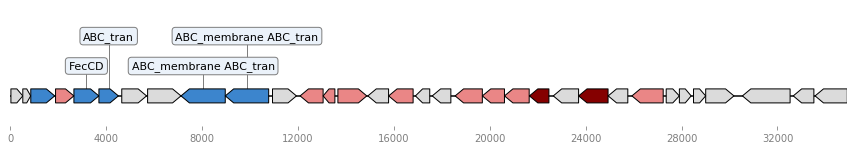

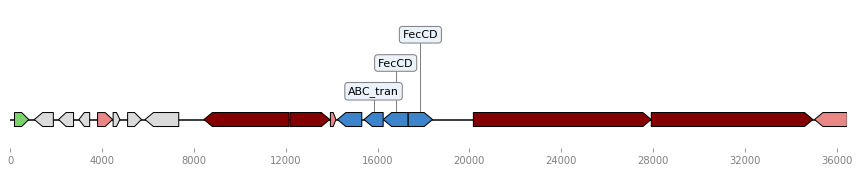

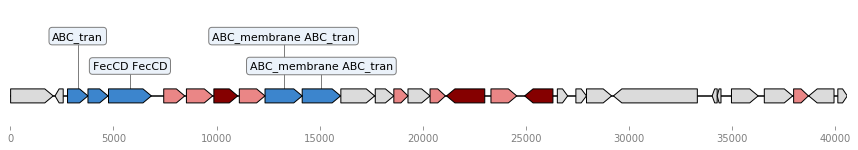

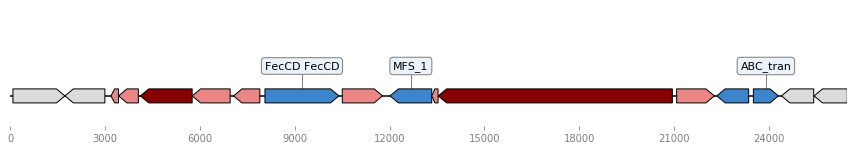

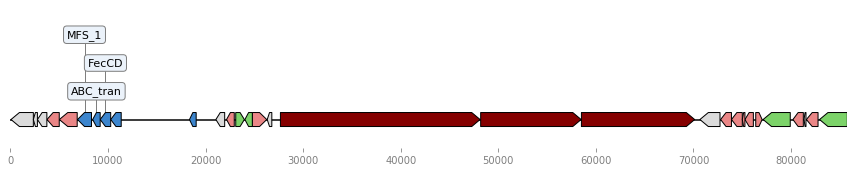

In [19]:
for BGC in mibig_struct[mibig_struct.BGC.isin(unknown_data.query("Peripla_BP_2 > 0")['BGC'])]['BGC']:
    mibig_viewer('/home/alexcc/song_collaboration/mibig_db2/mibig_gbk_2.0/', #1st is directory of downloaded mibig GBKs
                 './data/raw/mibig_pfam20.txt', #2nd is the new file in raw data
                 BGC) #3rd is BGC name
                 #4th argument can be a list of transporter PFAMs you want to label